# PCA using scikit-learn

This notebook is based on the tutorial available on [Towards Data Science](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60).

We will play applying PCA to the [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris).

### Step 1: Load the iris dataset

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

df = pd.read_csv(url, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Step 2: standardize the data

PCA is effected by scale so you need to scale the features in your data before applying PCA. Use **StandardScaler** to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1).

In [11]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# separating out the features and the target
x = df.loc[:, features].values
y = df.loc[:, ['target']].values

# standardizing the features
x = StandardScaler().fit_transform(x)


### Step 3: PCA projection to 2D

The original dataset has 4 columns (= dimensions), and we want to apply PCA to reduce to 2 dimensions.

In [12]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [13]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

### Step 4: Visualize 2D projection

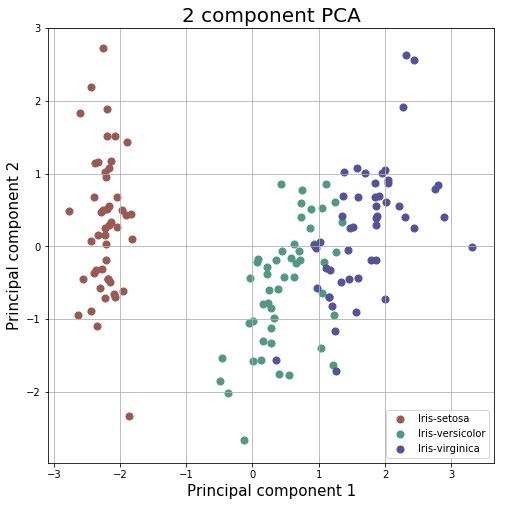

In [16]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal component 1', fontsize = 15)
ax.set_ylabel('Principal component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['#985a53', '#539885', '#555398']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
              finalDf.loc[indicesToKeep, 'principal component 2'],
              c = color, s=50)
ax.legend(targets)
ax.grid()